In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import openpyxl
# import xlwings as xw
# from openpyxl.drawing.image import Image
# from openpyxl.utils.dataframe import dataframe_to_rows  # 導入 dataframe_to_rows 函數
# from PIL import Image as PILImage
# import os

# class Chart:
#     def fit(self, data):
#         self.data = data

#     def plot_control_chart(self, data, column_name, sample_names, file_path):
#         mean = np.mean(data)
#         std = np.std(data)
#         upperbound = mean + 0.3
#         lowerbound = mean - 0.3
        
#         plt.figure(figsize=(30, 6))
        
#         # Plot the data points
#         plt.plot(data, marker="o", linestyle="-", color='blue', label="CD")
#         plt.axhline(y=mean, linestyle="--", color="green", label="Mean")
#         plt.axhline(y=upperbound, color="red", linestyle="--", label="UpperBound")
#         plt.axhline(y=lowerbound, color="orange", linestyle="--", label="LowerBound")
        
#         # Initialize color list for X-axis labels
#         label_colors = []
#         previous_scan = None
#         for i, label in enumerate(sample_names):
#             # Determine current scan and part (left, left-Median, etc.)
#             parts = label.split("->")
#             current_part = parts[0].strip().split('-')[0]
#             current_scan = parts[0].strip()
            
#             # Mark the first occurrence of each part and scan combination with red, others with black
#             if previous_scan != current_scan and current_part in ["left", "left-Median", "Median", "Right-Median", "Right"]:
#                 label_colors.append('red')
#             else:
#                 label_colors.append('black')
#             previous_scan = current_scan
        
#         # Set X-axis labels with custom colors
#         for i, (tick, label) in enumerate(zip(range(len(sample_names)), sample_names)):
#             plt.text(i, plt.ylim()[0] - 0.1, label, color=label_colors[i], rotation=40, fontsize=8, ha='right')
        
#         # Add vertical dashed lines to separate Scans
#         previous_scan = None
#         for i, label in enumerate(sample_names):
#             current_scan = label.split("->")[0].strip()
#             if previous_scan and current_scan != previous_scan:
#                 plt.axvline(x=i - 0.5, color='C9', linestyle="--")
#             previous_scan = current_scan
        
#         plt.legend()
#         plt.title(f"Control Chart for {column_name}")
#         plt.xlabel("Sample")
#         plt.ylabel("Value")
#         plt.tight_layout()
#         plt.savefig(file_path)  # Save the plot as an image
#         plt.close()

# def main():
#     # Read the first Excel file
#     input_file_path = r"U:\Chart_Script\charts.xlsx"
#     df = pd.read_excel(input_file_path, sheet_name=0, skiprows=22)
#     df.columns.values[0] = "Sample_Name"

#     sample_names = df['Sample_Name'].tolist()

#     # 指定Scan與M的規則
    
#     scan_subgroup_map_1 = {
#     "left-Scan1": {"M1": (1, 4), "M2": (5, 9), "M3": (10, 12), "M4": (13, 15), "M5": (16,18), "M6": (19,20)},  
#     "left-Scan2": {"M2": (21, 24), "M3": (25, 26), "M4": (27, 30),"M5": (31, 34), "M6": (35, 36), "M7": (37, 40)},  
#     "left-Scan3": {"M2": (41, 44), "M3": (45, 46), "M4": (47, 50),"M5": (51, 54), "M6": (55, 56), "M7": (57, 60)},
#     "left-Median-Scan1": {"M2": (61, 64), "M3": (65, 66), "M4": (67, 70),"M5": (71, 74), "M6": (75, 76), "M7": (77, 80)},
#     "left-Median-Scan2": {"M2": (81, 84), "M3": (85, 86), "M4": (87, 90),"M5": (91, 94), "M6": (95, 96), "M7": (97, 100)},
#     "left-Median-Scan3": {"M2": (101, 104), "M3": (105, 106), "M4": (107, 110),"M5": (111, 114), "M6": (115, 116), "M7": (117, 120)},
#     "Median-Scan1": {"M2": (121, 124), "M3": (125, 126), "M4": (127, 130),"M5": (131, 134), "M6": (135, 136), "M7": (137, 140)},
#     "Median-Scan2": {"M2": (141, 144), "M3": (145, 146), "M4": (147, 150),"M5": (151, 154), "M6": (155, 156), "M7": (157, 160)},
#     "Median-Scan3": {"M2": (161, 164), "M3": (165, 166), "M4": (167, 170),"M5": (171, 174), "M6": (175, 176), "M7": (177, 180)},
#     "Right-Median-Scan1": {"M2": (181, 184), "M3": (185, 186), "M4": (187, 190),"M5": (191, 194), "M6": (195, 196), "M7": (197, 200)},
#     "Right-Median-Scan2": {"M2": (201, 204), "M3": (205, 206), "M4": (207, 210),"M5": (211, 214), "M6": (215, 216), "M7": (217, 220)},
#     "Right-Median-Scan3": {"M2": (221, 224), "M3": (225, 226), "M4": (227, 230),"M5": (231, 234), "M6": (235, 236), "M7": (237, 240)},
#     "Right-Scan1": {"M2": (241, 244), "M3": (245, 246), "M4": (247, 250),"M5": (251, 254), "M6": (255, 256), "M7": (257, 260)},
#     "Right-Scan2": {"M2": (261, 264), "M3": (265, 266), "M4": (267, 270),"M5": (271, 274), "M6": (275, 276), "M7": (277, 280)},
#     "Right-Scan3": {"M2": (281, 284), "M3": (285, 286), "M4": (287, 290),"M5": (291, 294), "M6": (295, 296), "M7": (297, 300)},
#     "left-Scan4": {"M1": (301, 304), "M2": (305, 306), "M3": (307, 310),"M4": (311, 314), "M5": (315,316), "M6": (317, 320)},
    
# }
    
# #     scan_subgroup_map_1 = {
# #     "Scan1": {"M1": (1, 4), "M2": (5, 9), "M3": (10, 12), "M4": (13, 15), "M5": (16,18), "M6": (19,20)},  
# #     "Scan2": {"M2": (21, 24), "M3": (25, 26), "M4": (27, 30),"M5": (31, 34), "M6": (35, 36), "M7": (37, 40)},  
# #     "Scan3": {"M2": (41, 44), "M3": (45, 46), "M4": (47, 50),"M5": (51, 54), "M6": (55, 56), "M7": (57, 60)},
# #     "Scan4": {"M2": (61, 64), "M3": (65, 66), "M4": (67, 70),"M5": (71, 74), "M6": (75, 76), "M7": (77, 80)},
# #     "Scan5": {"M2": (81, 84), "M3": (85, 86), "M4": (87, 90),"M5": (91, 94), "M6": (95, 96), "M7": (97, 100)},
# #     "Scan6": {"M2": (101, 104), "M3": (105, 106), "M4": (107, 110),"M5": (111, 114), "M6": (115, 116), "M7": (117, 120)},
# #     "Scan7": {"M2": (121, 124), "M3": (125, 126), "M4": (127, 130),"M5": (131, 134), "M6": (135, 136), "M7": (137, 140)},
# #     "Scan8": {"M2": (141, 144), "M3": (145, 146), "M4": (147, 150),"M5": (151, 154), "M6": (155, 156), "M7": (157, 160)},
# #     "Scan9": {"M2": (161, 164), "M3": (165, 166), "M4": (167, 170),"M5": (171, 174), "M6": (175, 176), "M7": (177, 180)},
# #     "Scan10": {"M2": (181, 184), "M3": (185, 186), "M4": (187, 190),"M5": (191, 194), "M6": (195, 196), "M7": (197, 200)},
# #     "Scan11": {"M2": (201, 204), "M3": (205, 206), "M4": (207, 210),"M5": (211, 214), "M6": (215, 216), "M7": (217, 220)},
# #     "Scan12": {"M2": (221, 224), "M3": (225, 226), "M4": (227, 230),"M5": (231, 234), "M6": (235, 236), "M7": (237, 240)},
# #     "Scan13": {"M2": (241, 244), "M3": (245, 246), "M4": (247, 250),"M5": (251, 254), "M6": (255, 256), "M7": (257, 260)},
# #     "Scan14": {"M2": (261, 264), "M3": (265, 266), "M4": (267, 270),"M5": (271, 274), "M6": (275, 276), "M7": (277, 280)},
# #     "Scan15": {"M2": (281, 284), "M3": (285, 286), "M4": (287, 290),"M5": (291, 294), "M6": (295, 296), "M7": (297, 300)},
# #     "Scan16": {"M2": (301, 304), "M3": (305, 306), "M4": (307, 310),"M5": (311, 314), "M6": (315, 316), "M7": (317, 320)},
# # }
    
# #     scan_subgroup_map_2 = {
# #     "Scan1": {"M1": (1, 2), "M2": (3, 4), "M3": (5, 6), "M4": (7, 8), "M5": (9, 10), "M6": (11, 12)},
# #     "Scan2": {"M2": (13, 14), "M3": (15, 16), "M4": (17, 18), "M5": (19, 20), "M6": (21, 22)},
# #     "Scan3": {"M2": (23, 24), "M3": (25, 26), "M4": (27, 28), "M5": (29, 30), "M6": (31, 32), "M7": (33, 34)},
# #     "Scan4": {"M1": (35, 36), "M2": (37, 38), "M3": (39, 40), "M4": (41, 42), "M5": (43, 44), "M6": (45, 46)},
# #     "Scan5": {"M2": (47, 48), "M3": (49, 50), "M4": (51, 52), "M5": (53, 54), "M6": (55, 56)},
# #     "Scan6": {"M2": (57, 58), "M3": (59, 60), "M4": (61, 62), "M5": (63, 64), "M6": (65, 66), "M7": (67, 68)},
# #     "Scan7": {"M1": (69, 70), "M2": (71, 72), "M3": (73, 74), "M4": (75, 76), "M5": (77, 78), "M6": (79, 80)},
# #     "Scan8": {"M2": (81, 82), "M3": (83, 84), "M4": (85, 86), "M5": (87, 88), "M6": (89, 90)},
# #     "Scan9": {"M2": (91, 92), "M3": (93, 94), "M4": (95, 96), "M5": (97, 98), "M6": (99, 100), "M7": (101, 102)},
# #     "Scan10": {"M1": (103, 104), "M2": (105, 106), "M3": (107, 108), "M4": (109, 110), "M5": (111, 112), "M6": (113, 114)},
# #     "Scan11": {"M2": (115, 116), "M3": (117, 118), "M4": (119, 120), "M5": (121, 122), "M6": (123, 124)},
# #     "Scan12": {"M1": (125, 126), "M2": (127, 128), "M3": (129, 130), "M4": (131, 132), "M5": (133, 134), "M6": (135, 136)},
# #     "Scan13": {"M1": (137, 138), "M2": (139, 140), "M3": (141, 142), "M4": (143, 144), "M5": (145, 146), "M6": (147, 148)},
# #     "Scan14": {"M2": (149, 150), "M3": (151, 152), "M4": (153, 154), "M5": (155, 156), "M6": (157, 158)},
# #     "Scan15": {"M2": (159, 160), "M3": (161, 162), "M4": (163, 164), "M5": (165, 166), "M6": (167, 168), "M7": (169, 170)},
# #     "Scan16": {"M1": (171, 172), "M2": (173, 174), "M3": (175, 176), "M4": (177, 178), "M5": (179, 180), "M6": (181, 182)},
# #     "Scan17": {"M2": (183, 184), "M3": (185, 186), "M4": (187, 188), "M5": (189, 190), "M6": (191, 192)},
# #     "Scan18": {"M2": (193, 194), "M3": (195, 196), "M4": (197, 198), "M5": (199, 200), "M6": (201, 202), "M7": (203, 204)},
# #     "Scan19": {"M1": (205, 206), "M2": (207, 208), "M3": (209, 210), "M4": (211, 212), "M5": (213, 214), "M6": (215, 216)},
# #     "Scan20": {"M2": (217, 218), "M3": (219, 220), "M4": (221, 222), "M5": (223, 224), "M6": (225, 226)},
# #     "Scan21": {"M2": (227, 228), "M3": (229, 230), "M4": (231, 232), "M5": (233, 234), "M6": (235, 236), "M7": (237, 238)},
# #     "Scan22": {"M1": (239, 240), "M2": (241, 242), "M3": (243, 244), "M4": (245, 246), "M5": (247, 248), "M6": (249, 250)},
# #     "Scan23": {"M2": (251, 252), "M3": (253, 254), "M4": (255, 256), "M5": (257, 258), "M6": (259, 260)},
# #     "Scan24": {"M2": (261, 262), "M3": (263, 264), "M4": (265, 266), "M5": (267, 268), "M6": (269, 270), "M7": (271, 272)},
# #     "Scan25": {"M1": (273, 274), "M2": (275, 276), "M3": (277, 278), "M4": (279, 280), "M5": (281, 282), "M6": (283, 284)},
# #     "Scan26": {"M2": (285, 286), "M3": (287, 288), "M4": (289, 290), "M5": (291, 292), "M6": (293, 294)},
# #     "Scan27": {"M2": (295, 296), "M3": (297, 298), "M4": (299, 300), "M5": (301, 302), "M6": (303, 304), "M7": (305, 306)},
# #     "Scan28": {"M1": (307, 308), "M2": (309, 310), "M3": (311, 312), "M4": (313, 314), "M5": (315, 316), "M6": (317, 318)},
# #     "Scan29": {"M2": (319, 320), "M3": (321, 322), "M4": (323, 324), "M5": (325, 326), "M6": (327, 328)},
# #     "Scan30": {"M2": (329, 330), "M3": (331, 332), "M4": (333, 334), "M5": (335, 336), "M6": (337, 338), "M7": (339, 340)},
# # }
    
#     # 讓用戶選擇使用哪種掃描範圍
#     print("選擇掃描範圍：")
#     print("1: scan_subgroup_map_1")
#     print("2: scan_subgroup_map_2")
#     choice = input("請輸入 1 或 2: ")
    
#     if choice == '1':
#         scan_subgroup_map = scan_subgroup_map_1
#     elif choice == '2':
#         scan_subgroup_map = scan_subgroup_map_2
#     else:
#         print("無效的選擇，使用預設的掃描範圍 1。")
#         scan_subgroup_map = scan_subgroup_map_1


#     # Assign Scan and Subgroups
#     def assign_scan_and_subgroups(sample_names, scan_subgroup_map):
#         groups = []
#         subgroups = []

#         for scan, subgroup_ranges in scan_subgroup_map.items():
#             for subgroup, (start, end) in subgroup_ranges.items():
#                 for i in range(start - 1, end):
#                     if i < len(sample_names):
#                         groups.append(scan)
#                         subgroups.append(subgroup)
#                     else:
#                         break

#         return groups, subgroups

#     grouped_samples, subgroup_assignments = assign_scan_and_subgroups(sample_names, scan_subgroup_map)
    
#     df["PointJudge(I)"] = grouped_samples
#     df["SubRecipeNo(I)"] = subgroup_assignments  

#     df.rename(columns={"PointJudge(I)":"Group", "SubRecipeNo(I)":"SubGroup"}, inplace=True)
    
#     # Filter columns with values
#     column_of_interest = ['Sample_Name', 'X(R)', 'Y(R)', 'Group', 'SubGroup', "L1(R)", "L2(R)", "L3(R)", "L4(R)", "L5(R)", "A1(R)", "A2(R)", "A3(R)", "G1(R)", "G2(R)"]
#     exist_columns = [col for col in column_of_interest if col in df.columns]
#     no_nan_columns = [col for col in exist_columns if not df[col].isna().all()]
#     df_filtered = df[no_nan_columns]

#     def calculate_diffs(df, cols_to_calculate):
#         scans = df['Group'].unique()
#         diffs = []

#         for scan in scans:
#             scan_df = df[df['Group'] == scan]
#             subgroups = scan_df['SubGroup'].unique()

#             for i in range(len(subgroups) - 1):
#                 Mi = subgroups[i]
#                 Mj = subgroups[i + 1]

#                 for col in cols_to_calculate:
#                     Mi_last_value = scan_df[scan_df['SubGroup'] == Mi][col].iloc[-1]
#                     Mj_first_value = scan_df[scan_df['SubGroup'] == Mj][col].iloc[0]
#                     diff = Mi_last_value - Mj_first_value

#                     diffs.append({
#                         'Lens': f'{scan}-> {Mi}/{Mj}',
#                         f'Diff-{col}': diff
#                     })

#         return pd.DataFrame(diffs)

#     # Calculate differences
#     #cols_to_calculate = ["L1(R)", "L2(R)", "L3(R)", "L4(R)", "L5(R)", "A1(R)", "A2(R)"]
#     prefixes = ["L", "A"]
    
#     # 過濾以指定字母開頭的列
#     cols_to_calculate = [col for col in df_filtered.columns if any(col.startswith(prefix) for prefix in prefixes)]
#     #print(cols_to_calculate)
    
#     diff_df = calculate_diffs(df_filtered, cols_to_calculate)
#     diff_df_grouped = diff_df.groupby("Lens", as_index=False).first()

#     # Plot and insert images into the existing Excel file
#     app = xw.App(visible=True)#設置為 False。這樣 Excel 將在後台運行而不顯示給用戶。
#     wb = openpyxl.load_workbook(input_file_path)
    
#     # Insert calculated diff data into a new sheet
#     if 'Diff-Chart' in wb.sheetnames:
#         ws_diff = wb['Diff-Chart']
#     else:
#         ws_diff = wb.create_sheet(title='Diff-Chart')
    
#     for r in dataframe_to_rows(diff_df_grouped, index=False, header=True):
#         ws_diff.append(r)

#     # Insert control charts into the 'Diff-Chart' sheet
#     start_row = 1 #len(ws_diff['A']) + 2  # Start inserting images after the last row with data
#     for column_name in diff_df_grouped.columns:
#         if column_name.startswith("Diff-"):
#             image_file = os.path.join("U:\\Chart_Script", f"{column_name}.png")
#             chart = Chart()
#             chart.plot_control_chart(diff_df_grouped[column_name].values, column_name, diff_df_grouped['Lens'].tolist(), image_file)

#             # Insert image
#             img = Image(image_file)
#             img.width, img.height = PILImage.open(image_file).size
#             ws_diff.add_image(img, f'J{start_row}')

#             # Update position
#             #start_row += int(img.height / 15) + 2  # Adjust spacing based on image height
#             start_row += 30  # 調整間距以避免圖片重疊
            
#     # Save the updated Excel file
#     wb.save(input_file_path)
#     wb.close()
#     app.quit()

# if __name__ == "__main__":
#     main()

In [1]:
import pandas as pd
import mplcursors


# 假設有一個 DataFrame，其中包含 "Lens" 欄位
data = {'Lens': ['Left-Scan1', 'Left-Median-Scan1', 'Median-Scan1', 'Right-Median-Scan2', 'Right-Scan3']}
df = pd.DataFrame(data)

# 建立 "Position" 欄位，根據 Lens 欄位的內容來分類
def determine_position(lens_value):
    if 'Left-Median' in lens_value:
        return 'Left-Median'
    elif 'Left' in lens_value:
        return 'Left'
    elif 'Right-Median' in lens_value:
        return 'Right-Median'
    elif 'Right' in lens_value:
        return 'Right'
    elif 'Median' in lens_value:
        return 'Median'
    else:
        return 'Unknown'  # 用於處理未預期的情況
    
def determine_scan(lens_value):
    if 'Scan1' in lens_value:
        return 'Scan1'
    elif 'Scan2' in lens_value:
        return 'Scan2'
    elif 'Scan3' in lens_value:
        return 'Scan3'
    elif 'Right' in lens_value:
        return 'Right'
    elif 'Scan4' in lens_value:
        return 'Scan4'
    elif 'Scan5' in lens_value:
        return 'Scan5'
    elif 'Scan6' in lens_value:
        return 'Scan6'
    else:
        return 'Unknown'  # 用於處理未預期的情況

df['Position'] = df['Lens'].apply(determine_position)
df['Scan'] = df['Lens'].apply(determine_scan)

print(df)



                 Lens      Position   Scan
0          Left-Scan1          Left  Scan1
1   Left-Median-Scan1   Left-Median  Scan1
2        Median-Scan1        Median  Scan1
3  Right-Median-Scan2  Right-Median  Scan2
4         Right-Scan3         Right  Scan3


Select the rule to use:
1. Rule 1
2. Rule 2
Enter your choice (1 or 2): 1
      L1(R)   L2(R)  L3(R)  L4(R)   L5(R)  A1(R)  A2(R)
0    16.843  43.143  7.742  5.094  28.868 -0.268 -0.226
1    16.841  43.148  7.762  5.072  28.904 -0.255 -0.230
2    16.816  43.139  7.773  5.068  28.886 -0.259 -0.232
3    16.833  43.150  7.773  5.065  28.932 -0.250 -0.219
4    16.767  43.187  7.858  5.231  28.907 -0.243 -0.252
..      ...     ...    ...    ...     ...    ...    ...
315  16.727  43.143  7.758  5.261  29.349  0.050 -0.139
316  16.771  43.150  7.789  5.224  29.329  0.041 -0.157
317  16.791  43.161  7.777  5.199  29.326  0.011 -0.156
318  16.804  43.167  7.799  5.198  29.317  0.007 -0.145
319  16.868  43.215  7.790  5.280  29.192 -0.012 -0.146

[320 rows x 7 columns]


c:\python37\lib\site-packages\ipykernel_launcher.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\python37\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


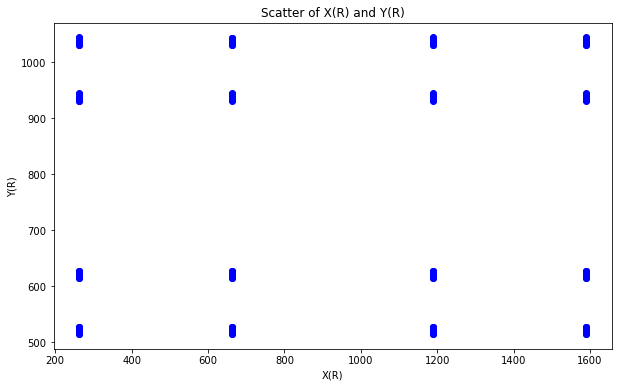

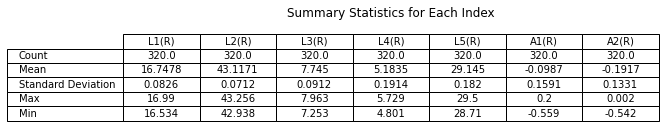

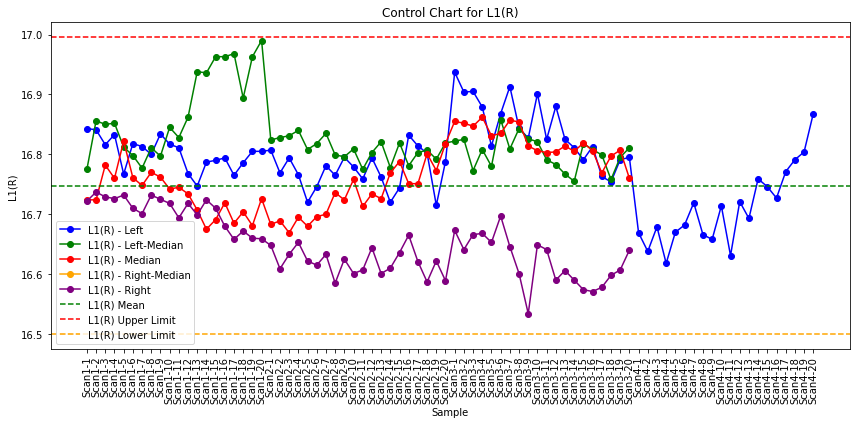

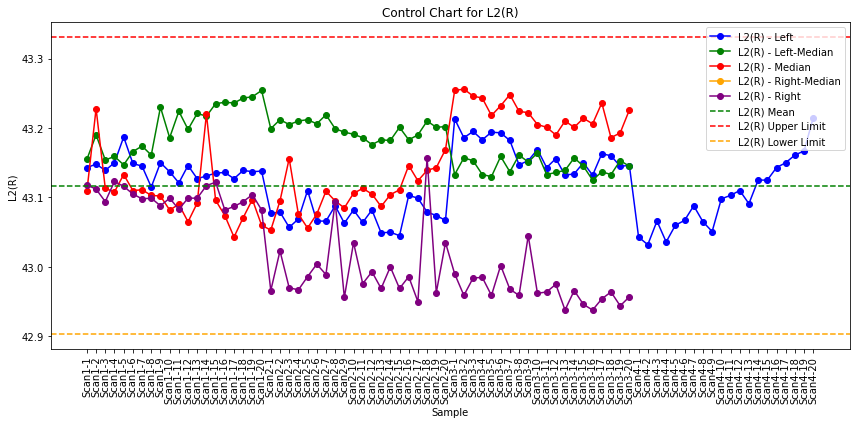

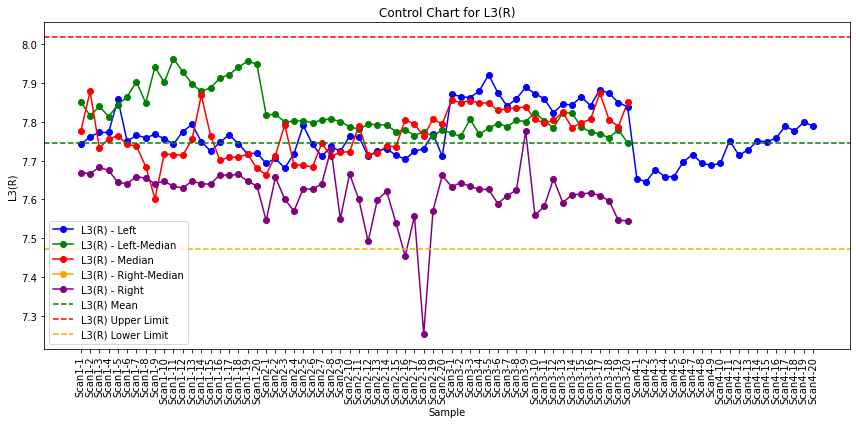

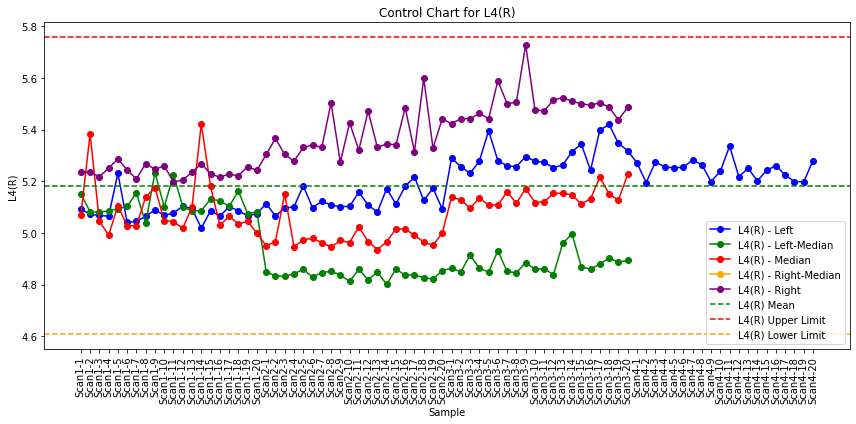

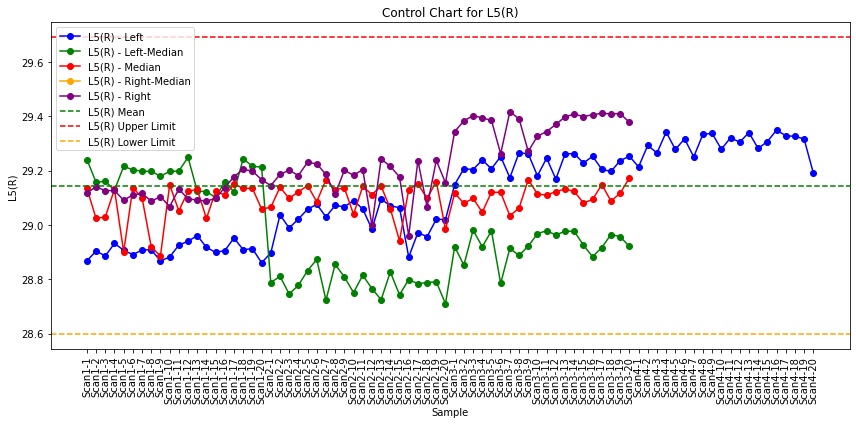

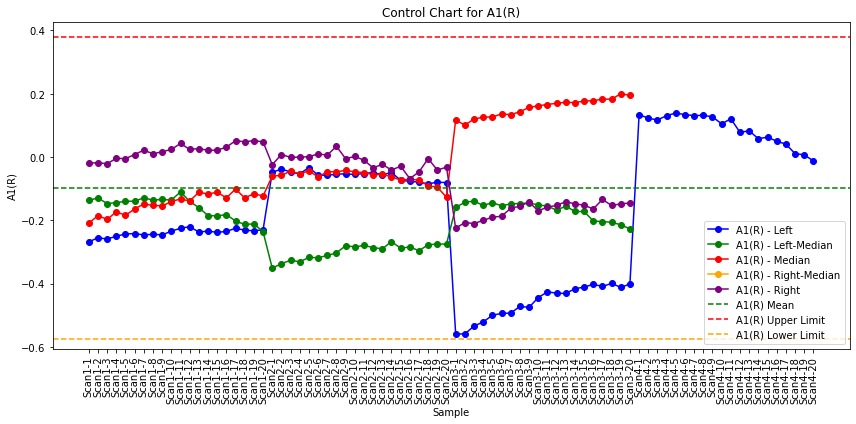

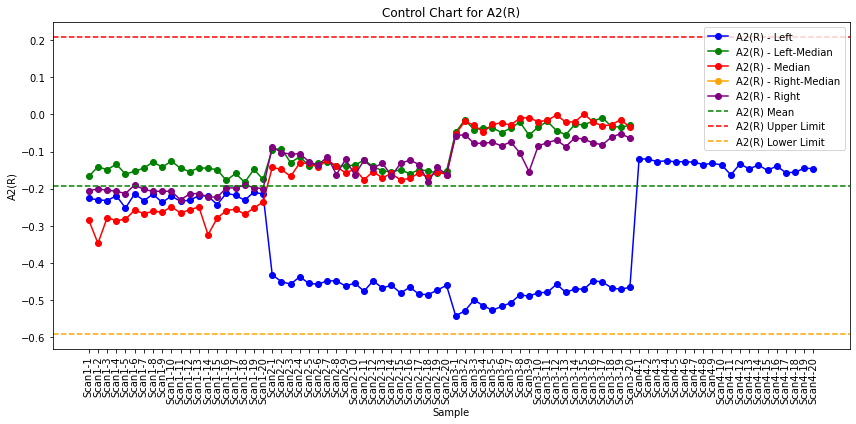

In [171]:
import numpy as np
import mplcursors
import matplotlib.pyplot as plt
import pandas as pd
import xlwings as xw
import os

class Chart:
    @staticmethod
    def read_excel_file(file_path):
        try:
            df = pd.read_excel(file_path)
            return df
        except Exception as e:
            return f"Error reading file: {e}"
    
    @staticmethod
    def classify_samples(sample_number, ranges_dict):
        for label, (start, end) in ranges_dict.items():
            if start <= sample_number <= end:
                return label
        return "Unclassified"
    
    def determine_position(lens_value):
        if 'Left-Median' in lens_value:
            return 'Left-Median'
        elif 'Left' in lens_value:
            return 'Left'
        elif 'Right-Median' in lens_value:
            return 'Right-Median'
        elif 'Right' in lens_value:
            return 'Right'
        elif 'Median' in lens_value:
            return 'Median'
        else:
            return 'Unknown'  # 用於處理未預期的情況
    
    def determine_scan(lens_value):
        if 'Scan1' in lens_value:
            return 'Scan1'
        elif 'Scan2' in lens_value:
            return 'Scan2'
        elif 'Scan3' in lens_value:
            return 'Scan3'
        elif 'Right' in lens_value:
            return 'Right'
        elif 'Scan4' in lens_value:
            return 'Scan4'
        elif 'Scan5' in lens_value:
            return 'Scan5'
        elif 'Scan6' in lens_value:
            return 'Scan6'
        else:
            return 'Unknown'  # 用於處理未預期的情況
        
    def update_sample_column_for_each_scan(df):
#     """
#     根據 Scan 為每個資料集的 Sample 欄位更新為 ScanX-1, ScanX-2,... 這樣的格式
#     """

    # 獲取所有唯一的 Scan
        unique_scans = df['Scan'].unique()
    
    # 為每個 Scan 生成對應的 Sample 編號
        for scan in unique_scans:
        # 選取對應 Scan 的子集資料
            scan_subset = df[df['Scan'] == scan].copy()
        
        # 計算子集資料的行數
            num_samples = scan_subset.shape[0]
        
        # 生成新的 Sample 欄位，格式為 ScanX-1 ~ ScanX-c
            scan_subset['Sample'] = [f'{scan}-{i+1}' for i in range(num_samples)]
        
        # 更新原 DataFrame 中對應的行
            df.loc[df['Scan'] == scan, 'Sample'] = scan_subset['Sample']
    
        return df

        
    def plot_scatter_chart(self, x_data, y_data, sheet, cell):
        plt.figure(figsize=(10, 6))
        plt.scatter(x_data, y_data, color='blue')
        plt.title("Scatter of X(R) and Y(R)")
        plt.xlabel("X(R)")
        plt.ylabel("Y(R)")
        
#         save_dir = "U:\\Chart_Script"  # 指定儲存圖片的位置
#         if not os.path.exists(save_dir):
#             os.makedirs(save_dir)  # 如果資料夾不存在，則創建
        
#         scatter_temp_file = os.path.join(save_dir, "scatter_chart.png")
#         plt.savefig(scatter_temp_file)
#         plt.close()
    
    @staticmethod
    def classify_samples_with_rule(sample_number, rule_choice):
        scan_ranges_1 = {
            "Left-Scan1": (1, 20),
            "Left-Scan2": (21, 40),
            "Left-Scan3": (41, 60),
            "Left-Median-Scan1": (61, 80),
            "Left-Median-Scan2": (81, 100),
            "Left-Median-Scan3": (101, 120),
            "Median-Scan1": (121, 140),
            "Median-Scan2": (141, 160),
            "Median-Scan3": (161, 180),
            "Right-Median-Scan1": (181, 200),
            "Right-Median-Scan2": (201, 220),
            "Right-Median-Scan3": (221, 240),
            "Right-Scan1": (241, 260),
            "Right-Scan2": (261, 280),
            "Right-Scan3": (281, 300),
            "Left-Scan4": (301, 320),
        }
    
        scan_ranges_2 = {
            "Left-Scan1": (1, 12),
            "Left-Scan2": (13, 22),
            "Left-Scan3": (23, 34),
            "Left-Median-Scan1": (35, 46),
            "Left-Median-Scan2": (47, 56),
            "Left-Median-Scan3": (57, 68),
            "Median-Scan1": (69, 80),
            "Median-Scan2": (81, 90),
            "Median-Scan3": (91, 102),
            "Right-Median-Scan1": (103, 114),
            "Right-Median-Scan2": (115, 124),
            "Right-Median-Scan3": (125, 136),
            "Right-Scan1": (137, 148),
            "Right-Scan2": (149, 158),
            "Right-Scan3": (159, 170),
            "Right-Scan4": (171, 182),
            "Right-Scan5": (183, 192),
            "Right-Scan6": (193, 204),
        }
    
        if rule_choice == 1:
            ranges_dict = scan_ranges_1
        elif rule_choice == 2:
            ranges_dict = scan_ranges_2
        else:
            return "Invalid rule choice"

        return Chart.classify_samples(sample_number, ranges_dict)

    @staticmethod
    def calculate_statistics(df):
        stats = pd.DataFrame(index=["Count", "Mean", "Standard Deviation", "Max", "Min"])
    
        for col in df.columns:
            count = df[col].count()
            mean = df[col].mean().round(4)
            std = df[col].std().round(4)
            max_value = df[col].max().round(4)
            min_value = df[col].min().round(4)
    
            stats[col] = [count, mean, std, max_value, min_value]
        
        return stats
    
    @staticmethod
    def plot_statistics_table(stats, sheet, cell):
        fig, ax = plt.subplots(figsize=(8, 2))  # 增加表格的寬度
        ax.axis("tight")
        ax.axis("off")
        table = ax.table(cellText=stats.values, colLabels=stats.columns, rowLabels=stats.index, cellLoc="center", loc="center")
        table.auto_set_font_size(False)
        table.set_fontsize(10)  # 減小字體大小
        table.scale(1.2, 1.2)  # 調整表格比例
    
        plt.title("Summary Statistics for Each Index")
    
#         Save the statistics table to a temporary file
#         stats_temp_file = os.path.join("U:\\Chart_Script", "statistics_table.png")
#         plt.savefig(stats_temp_file, bbox_inches="tight")  # 確保圖片不會被裁切
#         plt.close()
    
#         # Insert the statistics table into Excel
#         sheet.pictures.add(stats_temp_file, top=sheet.range(cell).top, left=sheet.range(cell).left)


    @staticmethod
    def plot_control_charts_with_lines(data_left, data_left_median, data_median, data_right_median, data_right):
    
    # 迴圈處理每個以 'L' 和 'A' 開頭的欄位
        columns_to_plot = [col for col in data_left.columns if col.startswith('L') or col.startswith('A')]
        
        for col in columns_to_plot:
            plt.figure(figsize=(12, 6))
            

        # 繪製5條不同資料集的線
            plt.plot(data_left['Sample'], data_left[col], marker='o', linestyle='-', color='b', label=f'{col} - Left')
            plt.plot(data_left_median['Sample'], data_left_median[col], marker='o', linestyle='-', color='g', label=f'{col} - Left-Median')
            plt.plot(data_median['Sample'], data_median[col], marker='o', linestyle='-', color='r', label=f'{col} - Median')
            plt.plot(data_right_median['Sample'], data_right_median[col], marker='o', linestyle='-', color='orange', label=f'{col} - Right-Median')
            plt.plot(data_right['Sample'], data_right[col], marker='o', linestyle='-', color='purple', label=f'{col} - Right')
            
            # 計算平均值和標準差
            mean = df[col].mean()
            std_dev = df[col].std()
            upper_limit = mean + 3 * std_dev
            lower_limit = mean - 3 * std_dev

        # 添加管制線：平均值、上限、下限
            plt.axhline(mean, color='green', linestyle='--', label=f'{col} Mean')
            plt.axhline(upper_limit, color='red', linestyle='--', label=f'{col} Upper Limit')
            plt.axhline(lower_limit, color='orange', linestyle='--', label=f'{col} Lower Limit')
        
            
        # 添加標題和標籤
            plt.title(f'Control Chart for {col}')
            plt.xlabel('Sample')
            plt.ylabel(col)
            plt.xticks(rotation=90)
            plt.legend()

        # 顯示圖像
            plt.grid(False)
            plt.tight_layout()  # 確保佈局不擁擠
            plt.show()
            
#         save_dir = "U:\\Chart_Script"  # 指定儲存圖片的位置
#         if not os.path.exists(save_dir):
#             os.makedirs(save_dir)  # 如果資料夾不存在，則創建
        
#         scatter_temp_file = os.path.join(save_dir, "scatter_chart.png")
#         plt.savefig(scatter_temp_file)
#         plt.close()
            


        
if __name__ == "__main__":
    print("Select the rule to use:")
    print("1. Rule 1")
    print("2. Rule 2")
    rule_choice = int(input("Enter your choice (1 or 2): "))

   # file_path = input("Enter the path to your Excel file: ")
    #file_path = file_path.strip().replace('\u202a', '')
    file_path = "simulated_data.xlsx"
    df = pd.read_excel(file_path, sheet_name=0, skiprows=22)
    #print(df)
    # Fix for rename operation to avoid None result
    df = df.rename(columns={"No(I)": "SampleNumber"})
    #print(df)
    # Assuming there is a 'SampleNumber' column
    sample_numbers = df['SampleNumber'].tolist()
    
    # Create new column 'Lens' based on classification
    df['Lens'] = [Chart.classify_samples_with_rule(number, rule_choice) for number in sample_numbers]
    
    # Define Position categories
    position_categories = ["Left", "Left-Median", "Median", "Right-Median", "Right"]
    
    # Create Position column based on Lens values
    df['Position'] = df['Lens'].apply(determine_position)
    df['Scan'] = df['Lens'].apply(determine_scan)
    
    # Reorder columns to place 'Position' as the second column
    columns = df.columns.tolist()
    columns.insert(1, columns.pop(columns.index('Position')))
    df = df[columns]
    
    # Print the updated DataFrame to see the changes
    #print(df)
    
    #app = xw.App(visible=True)#設置為 False。這樣 Excel 將在後台運行而不顯示給用戶。
    #wb = xw.Book(file_path)
    
    #獲取現有工作表，在舊的表後依序加入新的表
    #existing_sheets = wb.sheets
    #if len(existing_sheets) > 0:
    #    existing_sheet = existing_sheets[-1]  # 獲取最後一個工作表
    #else:
    #    existing_sheet = None
    
    # 在最後一個工作表後添加新工作表
    #ws_stats = wb.sheets.add('Statistics', after= existing_sheet)
    #ws_control = wb.sheets.add('Control Charts', after= ws_stats)
    
    # 繪製 X(R) 和 Y(R) 的散布圖
    if "X(R)" in df.columns and "Y(R)" in df.columns:
        x_data = df["X(R)"].values
        y_data = df["Y(R)"].values
        
        chart = Chart()
        chart.plot_scatter_chart(x_data, y_data, ws_stats, 'A9')  # ws_control
    else:
        print("X(R) 或 Y(R) 欄位不在資料中")
        
    column_of_interest = ["L1(R)", "L2(R)", "L3(R)", "L4(R)", "L5(R)", "A1(R)", "A2(R)", "A3(R)", "G1(R)", "G2(R)"]
    exist_columns = [col for col in column_of_interest if col in df.columns]
    no_nan_columns = [col for col in exist_columns if not df[col].isna().all()]
    
    df_filtered = df[no_nan_columns]
    print(df_filtered)
    
    N = len(df_filtered)
    sample_names = [f'Sample {i+1}' for i in range(N)]
    
    # 計算統計量
    stats = Chart.calculate_statistics(df_filtered)
    
    # 繪製統計表
    Chart.plot_statistics_table(stats, ws_stats, 'A1')
    
    #合成data，Position + df_filtered
    df_filtered["Position"] = df["Position"]
    # 取得所有欄位的名稱
    cols = df_filtered.columns.tolist()
   # 將最後一個欄位移到列表的第一個位置
    cols = [cols[-1]] + cols[:-1]
    # 根據重新排列的列表重新排列 DataFrame 的欄位
    df_filtered = df_filtered[cols]
    
    #合成data，Scan + df_filtered
    df_filtered["Scan"] = df["Scan"]
    # 取得所有欄位的名稱
    cols = df_filtered.columns.tolist()
   # 將最後一個欄位移到列表的第一個位置
    cols = [cols[0]] + [cols[-1]] + cols[1:-1]
    # 根據重新排列的列表重新排列 DataFrame 的欄位
    df_filtered = df_filtered[cols]
    
    #合成data，SampleName + df_filtered
    df_filtered["SampleNumber"] = df["SampleNumber"]
    # 取得所有欄位的名稱
    cols = df_filtered.columns.tolist()
   # 將最後一個欄位移到列表的第一個位置
    cols = [cols[-1]] + cols[:-1]
    # 根據重新排列的列表重新排列 DataFrame 的欄位
    df_filtered = df_filtered[cols]
    
    # 創建 'Sample' 欄位
    df_filtered['Sample'] = df_filtered.apply(lambda row: f"{row['Scan']}-{row['SampleNumber']}", axis=1)

    # 移動 'Sample' 欄位到最前面
    cols = ['Sample'] + [col for col in df_filtered.columns if col != 'Sample']
    df_filtered = df_filtered[cols]
    #df_filtered = df_filtered.drop("SampleNumber", axis='columns')
    #替換第一、二欄
    cols = df_filtered.columns.tolist()
    cols[0], cols[1] = cols[1], cols[0]  # 交換欄位
    # 根據重新排列的列表重新排列 DataFrame 的欄位
    df_filtered = df_filtered[cols]
    
    df_print = df_filtered.drop("Sample", axis='columns')

#     # 輸出到 Excel 文件
#     # 添加新工作表
#     ws_stats = wb.sheets['ExistingSheet']  # 替換為已存在的工作表名
#     ws_control = wb.sheets.add('Control Charts', after=ws_stats)

#     # 將 DataFrame 輸出到新工作表
#     ws_control.range('A1').options(index=False, header=True).value = df_print

    
    #挑選Position為Left為data_Left
    data_Left = df_filtered[df_filtered['Position'] == 'Left']
    data_Left_Median = df_filtered[df_filtered['Position'] == 'Left-Median']
    data_Median = df_filtered[df_filtered['Position'] == 'Median']
    data_Right_Median = df_filtered[df_filtered['Position'] == 'Right_Median']
    data_Right = df_filtered[df_filtered['Position'] == 'Right']
    
    data_Left = Chart.update_sample_column_for_each_scan(data_Left)
    data_Left_Median = Chart.update_sample_column_for_each_scan(data_Left_Median)
    data_Median = Chart.update_sample_column_for_each_scan(data_Median)
    data_Right_Median = Chart.update_sample_column_for_each_scan(data_Right_Median)
    data_Right = Chart.update_sample_column_for_each_scan(data_Right)
    
    Chart.plot_control_charts_with_lines(data_Left, data_Left_Median, data_Median, data_Right_Median, data_Right)
    
    

# 儲存 Excel
#     wb.save(os.path.join("U:\\Chart_Script", "charts.xlsx"))  # 輸出
#     wb.close()
#     app.quit()

In [14]:
df["Position"].unique()

array(['Left', 'Left-Median', 'Median', 'Right-Median', 'Right'],
      dtype=object)

In [99]:
data_Left

,SampleNumber,Sample,Position,Scan,L1(R),L2(R),L3(R),L4(R),L5(R),A1(R),A2(R)
0,1,Scan1-1,Left,Scan1,16.843,43.143,7.742,5.094,28.868,-0.268,-0.226
1,2,Scan1-2,Left,Scan1,16.841,43.148,7.762,5.072,28.904,-0.255,-0.230
2,3,Scan1-3,Left,Scan1,16.816,43.139,7.773,5.068,28.886,-0.259,-0.232
3,4,Scan1-4,Left,Scan1,16.833,43.150,7.773,5.065,28.932,-0.250,-0.219
4,5,Scan1-5,Left,Scan1,16.767,43.187,7.858,5.231,28.907,-0.243,-0.252
...,...,...,...,...,...,...,...,...,...,...,...
315,316,Scan4-16,Left,Scan4,16.727,43.143,7.758,5.261,29.349,0.050,-0.139
316,317,Scan4-17,Left,Scan4,16.771,43.150,7.789,5.224,29.329,0.041,-0.157
317,318,Scan4-18,Left,Scan4,16.791,43.161,7.777,5.199,29.326,0.011,-0.156
318,319,Scan4-19,Left,Scan4,16.804,43.167,7.799,5.198,29.317,0.007,-0.145


In [166]:
df_print = df_filtered.drop("Sample", axis='columns')
df_print

,SampleNumber,Position,Scan,L1(R),L2(R),L3(R),L4(R),L5(R),A1(R),A2(R)
0,1,Left,Scan1,16.843,43.143,7.742,5.094,28.868,-0.268,-0.226
1,2,Left,Scan1,16.841,43.148,7.762,5.072,28.904,-0.255,-0.230
2,3,Left,Scan1,16.816,43.139,7.773,5.068,28.886,-0.259,-0.232
3,4,Left,Scan1,16.833,43.150,7.773,5.065,28.932,-0.250,-0.219
4,5,Left,Scan1,16.767,43.187,7.858,5.231,28.907,-0.243,-0.252
...,...,...,...,...,...,...,...,...,...,...
315,316,Left,Scan4,16.727,43.143,7.758,5.261,29.349,0.050,-0.139
316,317,Left,Scan4,16.771,43.150,7.789,5.224,29.329,0.041,-0.157
317,318,Left,Scan4,16.791,43.161,7.777,5.199,29.326,0.011,-0.156
318,319,Left,Scan4,16.804,43.167,7.799,5.198,29.317,0.007,-0.145


In [ ]:
import numpy as np
import mplcursors
import matplotlib.pyplot as plt
import pandas as pd
import xlwings as xw
import os

class Chart:
    @staticmethod
    def read_excel_file(file_path):
        try:
            df = pd.read_excel(file_path)
            return df
        except Exception as e:
            return f"Error reading file: {e}"
    
    @staticmethod
    def classify_samples(sample_number, ranges_dict):
        for label, (start, end) in ranges_dict.items():
            if start <= sample_number <= end:
                return label
        return "Unclassified"
    
    def determine_position(lens_value):
        if 'Left-Median' in lens_value:
            return 'Left-Median'
        elif 'Left' in lens_value:
            return 'Left'
        elif 'Right-Median' in lens_value:
            return 'Right-Median'
        elif 'Right' in lens_value:
            return 'Right'
        elif 'Median' in lens_value:
            return 'Median'
        else:
            return 'Unknown'  # 用於處理未預期的情況
    
    def determine_scan(lens_value):
        if 'Scan1' in lens_value:
            return 'Scan1'
        elif 'Scan2' in lens_value:
            return 'Scan2'
        elif 'Scan3' in lens_value:
            return 'Scan3'
        elif 'Right' in lens_value:
            return 'Right'
        elif 'Scan4' in lens_value:
            return 'Scan4'
        elif 'Scan5' in lens_value:
            return 'Scan5'
        elif 'Scan6' in lens_value:
            return 'Scan6'
        else:
            return 'Unknown'  # 用於處理未預期的情況
        
    def update_sample_column_for_each_scan(df):
        unique_scans = df['Scan'].unique()
        for scan in unique_scans:
            scan_subset = df[df['Scan'] == scan].copy()
            num_samples = scan_subset.shape[0]
            scan_subset['Sample'] = [f'{scan}-{i+1}' for i in range(num_samples)]
            df.loc[df['Scan'] == scan, 'Sample'] = scan_subset['Sample']
        return df

    def plot_scatter_chart(self, x_data, y_data, save_path):
        plt.figure(figsize=(10, 6))
        plt.scatter(x_data, y_data, color='blue')
        plt.title("Scatter of X(R) and Y(R)")
        plt.xlabel("X(R)")
        plt.ylabel("Y(R)")
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(save_path)
        plt.close()
    
    @staticmethod
    def classify_samples_with_rule(sample_number, rule_choice):
        scan_ranges_1 = {
            "Left-Scan1": (1, 20),
            "Left-Scan2": (21, 40),
            "Left-Scan3": (41, 60),
            "Left-Median-Scan1": (61, 80),
            "Left-Median-Scan2": (81, 100),
            "Left-Median-Scan3": (101, 120),
            "Median-Scan1": (121, 140),
            "Median-Scan2": (141, 160),
            "Median-Scan3": (161, 180),
            "Right-Median-Scan1": (181, 200),
            "Right-Median-Scan2": (201, 220),
            "Right-Median-Scan3": (221, 240),
            "Right-Scan1": (241, 260),
            "Right-Scan2": (261, 280),
            "Right-Scan3": (281, 300),
            "Left-Scan4": (301, 320),
        }
    
        scan_ranges_2 = {
            "Left-Scan1": (1, 12),
            "Left-Scan2": (13, 22),
            "Left-Scan3": (23, 34),
            "Left-Median-Scan1": (35, 46),
            "Left-Median-Scan2": (47, 56),
            "Left-Median-Scan3": (57, 68),
            "Median-Scan1": (69, 80),
            "Median-Scan2": (81, 90),
            "Median-Scan3": (91, 102),
            "Right-Median-Scan1": (103, 114),
            "Right-Median-Scan2": (115, 124),
            "Right-Median-Scan3": (125, 136),
            "Right-Scan1": (137, 148),
            "Right-Scan2": (149, 158),
            "Right-Scan3": (159, 170),
            "Right-Scan4": (171, 182),
            "Right-Scan5": (183, 192),
            "Right-Scan6": (193, 204),
        }
    
        if rule_choice == 1:
            ranges_dict = scan_ranges_1
        elif rule_choice == 2:
            ranges_dict = scan_ranges_2
        else:
            return "Invalid rule choice"

        return Chart.classify_samples(sample_number, ranges_dict)

    @staticmethod
    def calculate_statistics(df):
        stats = pd.DataFrame(index=["Count", "Mean", "Standard Deviation", "Max", "Min"])
        for col in df.columns:
            count = df[col].count()
            mean = df[col].mean().round(4)
            std = df[col].std().round(4)
            max_value = df[col].max().round(4)
            min_value = df[col].min().round(4)
            stats[col] = [count, mean, std, max_value, min_value]
        return stats
    
    @staticmethod
    def plot_statistics_table(stats, save_path):
        fig, ax = plt.subplots(figsize=(8, 2))  # 增加表格的寬度
        ax.axis("tight")
        ax.axis("off")
        table = ax.table(cellText=stats.values, colLabels=stats.columns, rowLabels=stats.index, cellLoc="center", loc="center")
        table.auto_set_font_size(False)
        table.set_fontsize(10)  # 減小字體大小
        table.scale(1.2, 1.2)  # 調整表格比例
        plt.title("Summary Statistics for Each Index")
        plt.tight_layout()
        plt.savefig(save_path, bbox_inches="tight")  # 確保圖片不會被裁切
        plt.close()
    
    @staticmethod
    def plot_control_charts_with_lines(data_left, data_left_median, data_median, data_right_median, data_right, save_dir):
        columns_to_plot = [col for col in data_left.columns if col.startswith('L') or col.startswith('A')]
        for col in columns_to_plot:
            plt.figure(figsize=(12, 6))
            plt.plot(data_left['Sample'], data_left[col], marker='o', linestyle='-', color='b', label=f'{col} - Left')
            plt.plot(data_left_median['Sample'], data_left_median[col], marker='o', linestyle='-', color='g', label=f'{col} - Left-Median')
            plt.plot(data_median['Sample'], data_median['Sample'], marker='o', linestyle='-', color='r', label=f'{col} - Median')
            plt.plot(data_right_median['Sample'], data_right_median[col], marker='o', linestyle='-', color='orange', label=f'{col} - Right-Median')
            plt.plot(data_right['Sample'], data_right[col], marker='o', linestyle='-', color='purple', label=f'{col} - Right')
            mean = data_left[col].mean()
            std_dev = data_left[col].std()
            upper_limit = mean + 3 * std_dev
            lower_limit = mean - 3 * std_dev
            plt.axhline(mean, color='green', linestyle='--', label=f'{col} Mean')
            plt.axhline(upper_limit, color='red', linestyle='--', label=f'{col} Upper Limit')
            plt.axhline(lower_limit, color='orange', linestyle='--', label=f'{col} Lower Limit')
            plt.title(f'Control Chart for {col}')
            plt.xlabel('Sample')
            plt.ylabel(col)
            plt.xticks(rotation=90)
            plt.legend()
            plt.grid(False)
            plt.tight_layout()
            save_path = os.path.join(save_dir, f"{col}_control_chart.png")
            plt.savefig(save_path)
            plt.close()

if __name__ == "__main__":
    print("Select the rule to use:")
    print("1. Rule 1")
    print("2. Rule 2")
    rule_choice = int(input("Enter your choice (1 or 2): "))

    file_path = "simulated_data.xlsx"
    output_file_path = "AR03_single_charts.xlsx"
    
    # Read data from Excel file
    df = Chart.read_excel_file(file_path)

    # Update Sample column
    df = Chart.update_sample_column_for_each_scan(df)

    # Calculate statistics
    df_stats = Chart.calculate_statistics(df)
    
    # Save statistics table
    stats_file_path = "statistics_table.png"
    Chart.plot_statistics_table(df_stats, stats_file_path)
    
    # Create a new Excel workbook to save charts and statistics
    wb = xw.Book()
    
    # Insert statistics table into a new sheet
    ws_stats = wb.sheets.add(name='Statistics')
    ws_stats.range('A1').value = 'Summary Statistics for Each Index'
    ws_stats.pictures.add(stats_file_path, name='StatisticsTable', update=True, left=ws_stats.range('A1').left, top=ws_stats.range('A1').top + ws_stats.range('A1').height)
    
    # Create directory to save charts
    chart_dir = 'charts'
    os.makedirs(chart_dir, exist_ok=True)
    
    # Create and save control charts
    Chart.plot_control_charts_with_lines(df, df, df, df, df, chart_dir)
    
    # Insert charts into the Control Charts sheet
    ws_control = wb.sheets.add(name='Control Charts')
    chart_files = [f for f in os.listdir(chart_dir) if f.endswith('.png')]
    for i, chart_file in enumerate(chart_files):
        chart_path = os.path.join(chart_dir, chart_file)
        ws_control.pictures.add(chart_path, name=f'Chart_{i+1}', update=True, left=ws_control.range(f'A{i*15+1}').left, top=ws_control.range(f'A{i*15+1}').top)
    
    # Insert the DataFrame into the Control Charts sheet
    ws_control.range('A1').value = 'Data Summary'
    ws_control.range('A2').value = df.head()  # Adjust this line based on what you want to insert

    # Save workbook
    wb.save(output_file_path)
    wb.close()
